<a href="https://colab.research.google.com/github/VijayaBhargavi198/5731Assignments/blob/master/LSA_TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers
!pip install pysbd
!pip install pyLDAvis

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim imports
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
input_df=pd.read_csv("/content/sample_data/guardian_headlines.csv")


In [ ]:
#PREPROCESSING
#changing the whole list into smallercase
input_df["Headlines"] = input_df["Headlines"].str.lower()
#converting the dataframe to list
data = input_df["Headlines"].values.tolist()
#Remove new line character
data = [re.sub(' $','',sent) for sent in data]
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
#Remove single quotes
data = [re.sub('\s+',' ',sent) for sent in data]
#Remove colons
data = [re.sub(':','',sent) for sent in data]
#Remove hipens fron hipenated words
data = [re.sub('-','',sent) for sent in data]
print(data[:2])

['johnson is asking santa for a christmas recovery', '‘i now fear the worst’ four grim tales of working life upended by covid19']


In [ ]:
import nltk; 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer=PorterStemmer()
# list for tokenized documents in loop
texts = []

# loop through document list
for i in data:
    
    # tokenize document string
    tokens = word_tokenize(i)

    # remove stop words from tokens
    stop_words = set(stopwords.words('english')) 
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # stem tokens
    stemmed_tokens = [stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
texts[:2]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['johnson', 'ask', 'santa', 'christma', 'recoveri'],
 ['‘',
  'fear',
  'worst',
  '’',
  'four',
  'grim',
  'tale',
  'work',
  'life',
  'upend',
  'covid19']]

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [21]:
number_of_topics=20
words=10
model=create_gensim_lsa_model(texts,number_of_topics,words)

[(0, '-0.456*"," + -0.413*"uk" + -0.299*"busi" + -0.296*"\'s" + -0.242*"\'" + -0.225*"live" + -0.196*"brexit" + -0.190*"’" + -0.170*"say" + -0.156*"–"'), (1, '0.522*"busi" + -0.503*"," + 0.435*"live" + 0.291*"happen" + -0.192*"say" + -0.170*"\'s" + -0.159*"’" + 0.147*"–" + -0.095*"\'" + 0.083*"hit"'), (2, '-0.666*"\'s" + 0.471*"," + 0.305*"’" + -0.258*"\'" + -0.257*"uk" + 0.179*"busi" + 0.134*"say" + 0.121*"live" + 0.083*"happen" + 0.077*"‘"'), (3, '-0.701*"’" + 0.451*"uk" + -0.317*"\'s" + 0.249*"," + -0.182*"‘" + -0.147*"?" + 0.132*"say" + -0.121*"–" + -0.081*"busi" + -0.062*"."'), (4, '0.660*"uk" + 0.452*"’" + -0.299*"," + -0.267*"\'s" + -0.225*"\'" + -0.169*"busi" + -0.150*"live" + 0.134*"brexit" + 0.124*"‘" + -0.102*"happen"'), (5, '0.874*"\'" + -0.393*"\'s" + -0.165*"," + 0.105*"’" + -0.068*"financ" + -0.066*"nil" + -0.066*"pratley" + -0.049*"uk" + -0.048*"?" + -0.046*"busi"'), (6, '-0.802*"brexit" + -0.360*"?" + 0.202*"uk" + -0.161*"nodeal" + 0.146*"’" + -0.135*"guardian" + -0.10

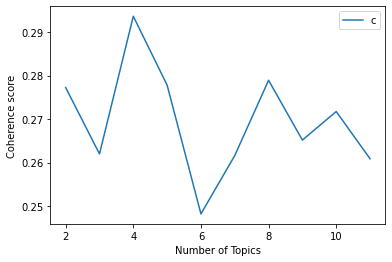

In [22]:
start,stop,step=2,12,1
plot_graph(texts,start,stop,step)